# LogisticRegression

In [1]:
#19/12/2019
#Logistic regression (relationship between two variables, sigmoid fn graph, used for classification)

C:\Users\Indian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[146  20]
 [ 24  77]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       166
           1       0.79      0.76      0.78       101

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267

0.8352059925093633


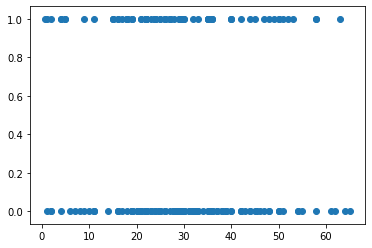

In [3]:
# 1.importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  #here we are fetching mainly pyplot from matplotlib

from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #accuracy check- confusion matrix
from sklearn.metrics import classification_report,accuracy_score


#2. collecting data

dataset=pd.read_csv('titanic.csv')
#dataset.info()
#dataset.head()
#dataset.tail()
#dataset.describe()
#dataset.count()


#3. analysing data (using seaborn libraries)

#sns.countplot(x='Sex', data=dataset)
#sns.countplot(x='Survived',data=dataset)
#sns.countplot(x='Survived',hue='Sex',data=dataset)# hue refers which column used for colour encoding
#sns.countplot(x='Survived',hue='Pclass',data=dataset)

#dataset['Age'].plot.hist()
#dataset['Fare'].plot.hist()
#dataset[dataset['Sex'].str.match('female')].count()
#dataset[dataset['Sex'].str.match('male')].count()

#sns.boxplot(x='Pclass',y="Age",data=dataset)


#4.cleaning data (find null values)
#dataset.isnull()
#dataset.isnull().sum()
#plt.figure(figsize=(20.0,10.0))
#sns.heatmap(dataset.isnull())

#fill null values with mean values in age column
mean=dataset['Age'].mean()
dataset["Age"]=dataset['Age'].fillna(mean) #fill null values with mean values
dataset.isnull().sum()


dataset.drop('Cabin',inplace=True,axis=1)#axis is structure 
dataset.dropna(inplace=True)
#dataset.isnull().sum()

20/12/2019

#5. Data modelling (converting categorical to numerical values, it will be easy the machine to understand numerical variables than string variables) v)


# obtain columns having numerical values 0 or 1..column headings will be the original values and
#omits one column to make the table more precise
#Eg:1. 'Sex' column contains 2 strings 'male' and 'female'. creating 2 columns as heading 'male' and 'female'
# male=1 it is male...male=0 ,its female..vice versa..(female column not needed becz male col can indicate value of female)
#eg :2. 'Pclass' contains values 1,2,3..creating 2 columns as heading 2 ,3 respectively.(see the output)
#column name 1 is not needed.if col 2=0 and col 3=0 then col 1 value will be 1.
a=pd.get_dummies(dataset['Sex'],drop_first=True)#a is dummy column(column'male' in the output)
b=pd.get_dummies(dataset['Pclass'],drop_first=True) #b is dummy column(columns '2' and '3' in the output )
c=pd.get_dummies(dataset['Embarked'],drop_first=True) #c is dummy column (columns 'Q' and 'S' in the output)
dataset=pd.concat([dataset,a,b,c],axis=1)# adding the newly created columns in to the original dataset
dataset.head()

#deleting Sex,Pclass and Embarked columns(we created dummy columns for these) and other unwanted columns
dataset.drop(['PassengerId','Pclass','Name',"Sex",'Ticket','Embarked'],axis=1,inplace=True)
dataset.head()

#Logistic regression starts here( take Y=survived and X as all other columns)

X=dataset.drop('Survived',axis=1)
Y=dataset['Survived']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.3)

#test_size=0.3 indicates  we take 70% data for training purpose and 30% for testing
#random_state=1 indicates same pattern of splitting occurs every time when we run the code..


#next we are going to import model
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train) #giving training datas in to the model
Y_pred=logmodel.predict(X_test)#We will get y prediction value from giving xtest into the model

#now we have tables having columns  x test, y pred....and other table having columns xtest and y test...we are going to compare y pred and y test
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

#146+77=223)/223+24+20= .83  (statictical value from confusion matrix) 

plt.scatter(X_test["Age"],Y_pred) #we will get a sigmoid plot since logistic regression

#dataset=pd.concat([dataset,Y_pred],axis=1)
#sns.countplot(x='Age',hue='Y_pred',data=dataset)
print(accuracy_score(Y_test,Y_pred))





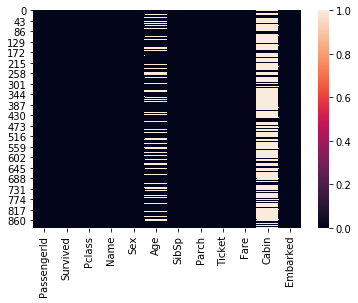

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  #here we are fetching mainly pyplot from matplotlib

from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #accuracy check- confusion matrix
from sklearn.metrics import classification_report,accuracy_score


#2. collecting data

dataset=pd.read_csv('titanic.csv')
#dataset.info()
#dataset.head()
#dataset.tail()
#dataset.describe()
#dataset.count()


#3. analysing data (using seaborn libraries)

#sns.countplot(x='Sex', data=dataset)
#sns.countplot(x='Survived',data=dataset)
#sns.countplot(x='Survived',hue='Sex',data=dataset)# hue refers which column used for colour encoding
#sns.countplot(x='Survived',hue='Pclass',data=dataset)

#dataset['Age'].plot.hist()
#dataset['Fare'].plot.hist()
#dataset[dataset['Sex'].str.match('female')].count()
#dataset[dataset['Sex'].str.match('male')].count()

#sns.boxplot(x='Pclass',y="Age",data=dataset)

sns.heatmap(dataset.isnull())

